In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv("dataset full 7f.csv")

In [2]:
dataset.shape

(222552, 8)

# Dataframe processed

In [3]:
# input
x = dataset.iloc[:, :-1].values
  
# output
y = dataset.iloc[:, -1].values


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

In [5]:
X_train
# X_train.shape

array([[1.37326494e+00, 1.30000000e+01, 5.65349544e+01, ...,
        3.29000000e+02, 3.37386018e-01, 2.74390244e-02],
       [2.01395363e+00, 2.00000000e+01, 4.42844284e+01, ...,
        2.22200000e+03, 3.78037804e-02, 6.93381360e-02],
       [1.66767601e+00, 5.50000000e+01, 4.57312546e+01, ...,
        1.34700000e+03, 3.60801782e-01, 7.80089153e-02],
       ...,
       [1.91702925e+00, 2.10000000e+01, 3.88915663e+01, ...,
        2.07500000e+03, 4.51084337e-01, 8.63066538e-02],
       [1.70155488e+00, 4.60000000e+01, 4.30690073e+01, ...,
        3.30400000e+03, 4.12227603e-01, 7.44777475e-02],
       [1.52110644e+00, 2.10000000e+01, 5.05037783e+01, ...,
        7.94000000e+02, 7.55667506e-01, 5.04413619e-02]])

In [6]:
X_test
# X_test.shape

array([[1.24481294e+00, 2.00000000e+00, 5.33333333e+01, ...,
        7.50000000e+01, 7.60000000e-01, 4.05405405e-02],
       [2.25328183e+00, 2.80000000e+01, 3.89920424e+01, ...,
        1.88500000e+03, 1.25729443e-01, 7.32484076e-02],
       [1.53606352e+00, 1.10000000e+01, 5.09090909e+01, ...,
        1.65000000e+02, 2.36363636e-01, 7.92682927e-02],
       ...,
       [1.28706868e+00, 6.10000000e+01, 5.42894565e+01, ...,
        1.52700000e+03, 6.24754420e-01, 4.58715596e-02],
       [1.18660326e+00, 1.58000000e+02, 5.80474934e+01, ...,
        6.82200000e+03, 8.20580475e-01, 3.40126081e-02],
       [1.47633422e+00, 0.00000000e+00, 3.91304348e+01, ...,
        2.30000000e+01, 0.00000000e+00, 9.09090909e-02]])

In [7]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train) 
X_test = sc_x.transform(X_test)
  
print (X_train[0:10, :])

[[-0.4464071  -0.46974983  0.9225087  -0.36675603 -0.51821016  0.60480723
  -1.26643765]
 [ 0.48230171 -0.34901484 -0.42269177  0.78819998  0.42582643 -0.74221058
   0.14918732]
 [-0.01964422  0.25466014 -0.2638193  -0.08879981 -0.01053491  0.71009201
   0.44214273]
 [-0.94910353  1.25503581  1.8496161   0.39283122  0.22335477 -0.25853836
  -1.33720931]
 [ 0.25303646  0.151173   -0.50543491  1.00864802  2.07751645  0.65023012
  -0.01353451]
 [ 1.33991433 -0.6422284  -1.54386595 -0.50813031 -0.61495771 -0.1128426
   1.08428958]
 [-1.04441742 -0.05580128  1.78174273 -0.24455114 -0.39403419  1.84161343
  -1.37372986]
 [-0.05493421  1.82421507 -0.30448431 -0.23736262  4.45082346 -0.67367775
  -0.13191208]
 [ 0.11148279 -0.67672411 -0.30751407 -0.50573414 -0.64487963 -0.9121885
  -0.36720855]
 [ 0.02970455 -0.45250198  0.23721759 -0.38592542 -0.51272448  0.31768745
   0.19845901]]


In [8]:
X_train.shape

(166914, 7)

# Logistic Regression model

In [9]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [10]:
# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(classifier, x, y, cv=5)
# print("Logistic Regression Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[27108   502]
 [ 1263 26765]]


In [12]:

from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9682770768180021


In [13]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Test set RMSE:', rmse)


Test set RMSE: 0.1781093012225861


In [31]:
from sklearn.metrics import f1_score


f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)

F1 score: 0.8873853336494447


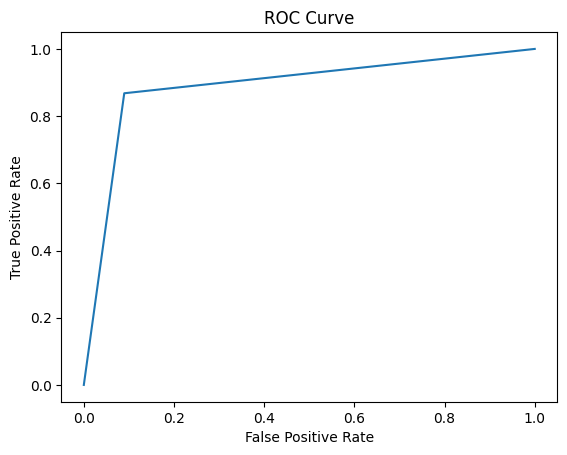

AUC Score: 0.8891735896431401


In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# compute fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# compute and print the AUC score
auc_score = roc_auc_score(y_test, y_pred)
print('AUC Score:', auc_score)


# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

random_classifier = RandomForestClassifier(n_estimators=50, random_state=0)
random_classifier.fit(X_train, y_train)

y_pred = random_classifier.predict(X_test)

In [36]:
# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(random_classifier, x, y, cv=5)
# print("Logistic Regression Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[27200   410]
 [  446 27582]]


In [38]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9846148315899206


In [39]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Test set RMSE:', rmse)


Test set RMSE: 0.12403696388609099


In [40]:
from sklearn.metrics import f1_score


f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)

F1 score: 0.9847197429489468


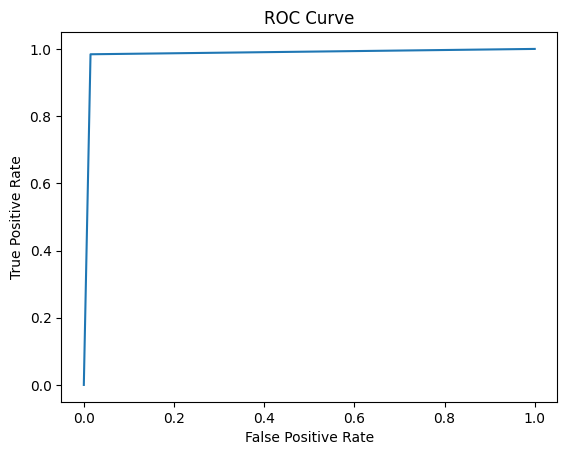

AUC Score: 0.9846188245448348


In [41]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# compute fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# compute and print the AUC score
auc_score = roc_auc_score(y_test, y_pred)
print('AUC Score:', auc_score)


# Support Vector Machine

In [42]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', random_state=0)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

In [43]:
# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(svm_classifier, x, y, cv=5)
# print("Logistic Regression Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[27069   541]
 [ 1152 26876]]


In [45]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9695711564038966


In [46]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Test set RMSE:', rmse)

Test set RMSE: 0.17443865281554827


In [47]:
from sklearn.metrics import f1_score


f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)

F1 score: 0.9694652358192803


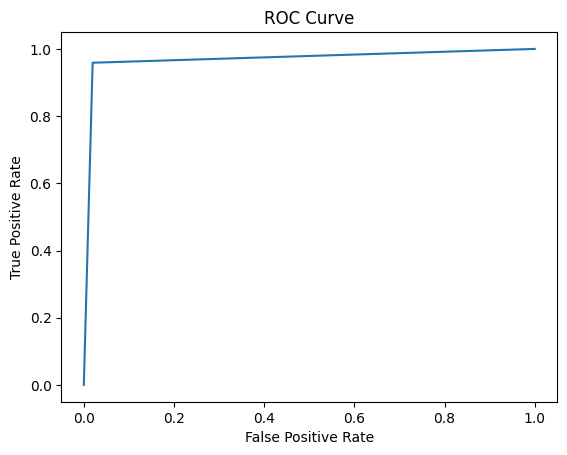

AUC Score: 0.969651947369648


In [48]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# compute fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# compute and print the AUC score
auc_score = roc_auc_score(y_test, y_pred)
print('AUC Score:', auc_score)


# Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

In [50]:
# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(nb_classifier, x, y, cv=5)
# print("Logistic Regression Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[25134  2476]
 [ 3699 24329]]


In [52]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.889014702181962


In [29]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Test set RMSE:', rmse)

Test set RMSE: 0.333144559940633


In [53]:
from sklearn.metrics import f1_score


f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)

F1 score: 0.8873853336494447


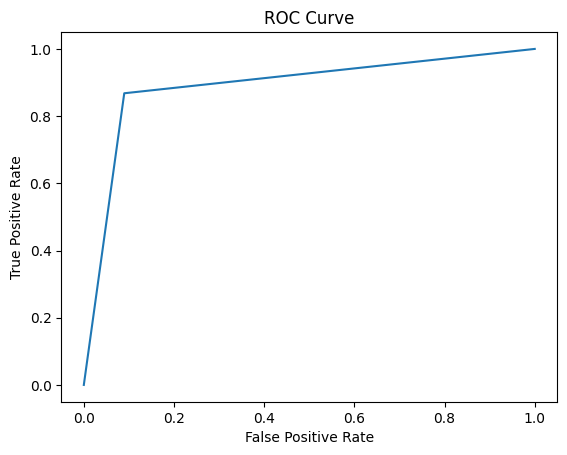

AUC Score: 0.8891735896431401


In [54]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# compute fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# compute and print the AUC score
auc_score = roc_auc_score(y_test, y_pred)
print('AUC Score:', auc_score)


# Pickle formation

In [30]:
import pickle

with open('lr_model.pkl','wb') as files:
    pickle.dump(classifier,files)
with open('random_model.pkl','wb') as files:
    pickle.dump(random_classifier,files)
with open('nb_model.pkl','wb') as files:
    pickle.dump(nb_classifier,files)
with open('svm_model.pkl','wb') as files:
    pickle.dump(svm_classifier,files)